# CO22 - Solutions of Schrödinger's Equation by Numerical Integration
Calum Holker

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.misc import derivative as der
from scipy.special import eval_hermite as herm

In [6]:
def solve_numerov(f, x, psi0, dpsi0, parity='even'):
    """ Solving d^2(psi)/dx^2 = f(x) psi from x0 to x1 with boundary condition psi(x0)=psi0 and d(psi(x0))/dx = dpsi0
    Input:  f - the function to be called on the rhs of the equation, receives x and returns the value of f(x)
            x - array of the integration, (upper bound x0, lower bound x1)
            psi0 - the value of \psi at x0
            dpsi0 - the value of \psi derivative at x0
            parity - determines even or odd solutions
    Output: psi - array of values of \psi with each element in the array corresponding to the same element in x
    """
    dx = x[1]-x[0]
    
    if parity == 'even':
        psidx = psi0 + 0.5*(dx)**2*(f(0)*psi0)+(1/24)*(dx**4)*(der(f, 0, dx=1e-6, n=2)*psi0+(2*der(f, 0, dx=1e-6, n=1)*dpsi0)+f(0)**2*psi0)
    elif parity == 'odd':
        psidx = dx*dpsi0 + (dx**3)*(1/6)*(f(0)*dpsi0+der(f, 0, dx=1e-6, n=1)*psi0)

    psi = [psi0, psidx]    
    
    for j in range(1, len(x)-1):
        A1 = 2+((5/6)*dx**2*f(j*dx))
        A2 = (1-((dx**2)/12)*f((j-1)*dx))
        A3 = (1-((dx**2)/12)*f((j+1)*dx))
        psi.append((A1*psi[j]-A2*psi[j-1])/A3)
    return psi

In [7]:
def solve_analytically(n, x, norm = True):
    """ Finds the analytical solution
    Input:  n - energy level
            dx - spacing
            x1 - upper bound for x
            norm - defines if psi is normalised or not, by default is True
    Output: psi - analytical solution
    """
    hermite = herm(n, x)
    exp = np.exp(-0.5*np.multiply(x, x))
    psi = hermite*exp
    if norm:
        return np.divide(psi, max(psi))
    else:
        return psi

In [8]:
def solve_numerically(n, x, E, norm = True):
    """ Finds the analytical solution
    Input:  n - energy level
            dx - spacing
            x1 - upper bound for x
            E - energy of oscillator
            norm - defines if psi is normalised or not, by default is True
    Output: psi - numerical solution
    """
    f = lambda y: y**2-E
    if n%2 == 0:
        psi = solve_numerov(f, x, 1, 0)
    else:
        psi = solve_numerov(f, x, 0, 1, parity='odd')
    if norm:
        return np.divide(psi, max(psi))
    else:
        return psi

In [38]:
def find_oscillator_eigenvalue(n, x, E0=1, norm = True, step=0.01):
    """ Finding the eigenvalue for harmonic oscillator potential by iteration with starting value E0
    Input:  E0 - the initial guess of the eigenvalue
    Output: E - the eigenvalue near the initial guess of the system with harmonic oscillator potential
    Constraints: E0 is a positive real number
    """
    E = E0
    psi = solve_numerically(n, x, E, norm)
    dx = x[1]-x[0]
    slopeinit = (psi[-1]-psi[-2])/dx
    if slopeinit > 0:
        slope = slopeinit
        while slope > 0:
            slope_before = slope
            E = E-step
            psi = solve_numerically(n, x, E, norm)
            slope = (psi[-1]-psi[-2])/dx
            if abs(slope) > abs(slope_before):
                step = step*-1
    else:
        slope = slopeinit
        while slope < 0:
            slope_before = slope
            E = E+step
            psi = solve_numerically(n, x, E, norm)
            slope = (psi[-1]-psi[-2])/dx
            if abs(slope) > abs(slope_before):
                step = step * -1
    return E

In [161]:
def plot_num(n, x1, dx, E, scale = 1, marker = '.', label = 'Numerical Solution'):
    x_pos = np.arange(0, x1, dx)
    psi_pos = solve_numerically(n, x_pos, E)
    x_neg = x_pos * -1
    if n % 2 == 0:
        psi_neg = solve_numerically(n, x_pos, E)
    else:
        psi_neg = solve_numerically(n, x_pos, E) * -1
    x = np.concatenate((x_pos, x_neg), axis=0)
    psi = np.concatenate((psi_pos, psi_neg), axis=0)
    plt.plot(x, psi*scale, marker, label=label)
    plt.legend()

In [162]:
def plot_an(n, x1, dx, scale = 1, marker = '+', label = 'Analytical Solution'):
    x_pos = np.arange(0, x1, dx)
    x_neg = x_pos * -1
    x = np.concatenate((x_pos, x_neg), axis=0)
    psi = solve_analytically(n, x)
    plt.plot(x, psi*scale, marker, label=label)
    plt.legend()

Text(0, 0.5, 'psi')

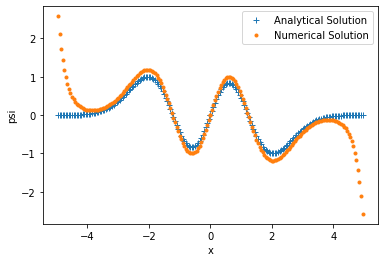

In [169]:
n = 3
x1 = 5
dx = 0.05
E = 6.99
plot_an(n, x1, dx, scale=-1)
plot_num(n, x1, dx, E, scale=1)
plt.xlabel('x')
plt.ylabel('psi')

Text(0, 0.5, 'psi')

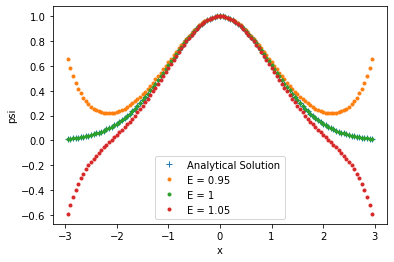

In [173]:
n = 0
x1 = 3
dx = 0.05
Es = [0.95, 1, 1.05]
plot_an(n, x1, dx, scale=1)
for E in Es:
    plot_num(n, x1, dx, E, scale=1, label=f"E = {E}")
plt.xlabel('x')
plt.ylabel('psi')